<a href="https://colab.research.google.com/github/emanuel379/Regressao---II/blob/main/Exerc%C3%ADcio_3_Lista_5_SME0823_Modelos_de_Regress%C3%A3o_e_Aprendizado_Supervisionado_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ada Maris Pereira Mário - 12725432

Amanda Caroline de Oliveira Pires - 12559090

Emanuel Victor da Silva Favorato - 12558151

Gabriela dos Santos Amaral - 13749681

Gabriela Scaranello Teixeira de Barros - 9284334

In [ ]:
install.packages("dglm")
library(dglm)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



# Análise exploratória dos dados

In [ ]:
# Importando os dados
data <- read.table("https://www.ime.usp.br/~giapaula/claims.txt", header=TRUE)

# Substituindo os nomes das colunas para melhor entendimento
colnames(data) <- c("valorv", "expos", "nsinistros", "csinistros", "tipov", "idadev", "sexoc", "areac", "idadec")

# Codificando sexoc como 1 para "M" e 0 para "F"
data$sexoc <- ifelse(data$sexoc == "M", 1, 0)

# Criando a variável cmsinistros como csinistros/nsinistros
data$cmsinistros <- data$csinistros / data$nsinistros

# Observando alguns dados
head(data)

,valorv,expos,nsinistros,csinistros,tipov,idadev,sexoc,areac,idadec,cmsinistros
,<dbl>,<dbl>,<int>,<dbl>,<chr>,<int>,<dbl>,<chr>,<int>,<dbl>
1,1.51,0.9938398,1,806.6100,SEDAN,3,0,F,4,806.6100
2,0.76,0.5393566,1,401.8055,HBACK,3,1,C,4,401.8055
3,1.89,0.6543463,2,1811.7100,STNWG,3,1,F,2,905.8550
4,4.06,0.8514716,1,5434.4400,STNWG,2,1,F,3,5434.4400
5,1.39,0.3175907,1,865.7900,HBACK,3,0,A,4,865.7900
6,2.66,0.3175907,1,1105.7700,STNWG,1,0,F,5,1105.7700


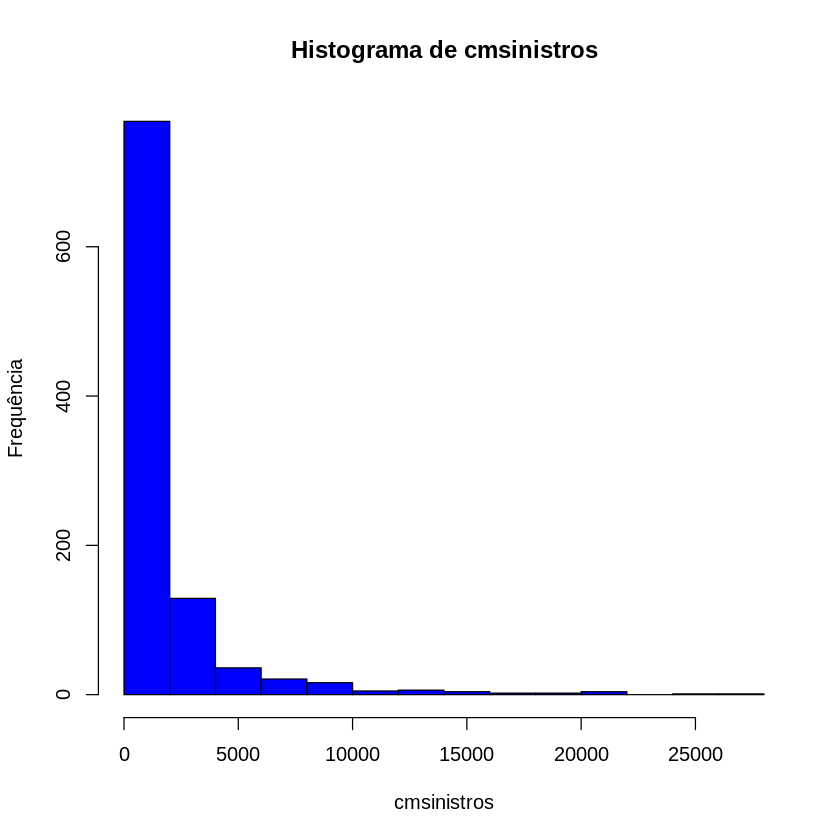

In [ ]:
# Gerando um histograma para a variável resposta(cmsinistros)
hist(data$cmsinistros,
     main = "Histograma de cmsinistros",
     xlab = "cmsinistros",
     ylab = "Frequência",
     col = "blue")

Histogramas para as preditoras numéricas que serão consideradas no ajuste do modelo.

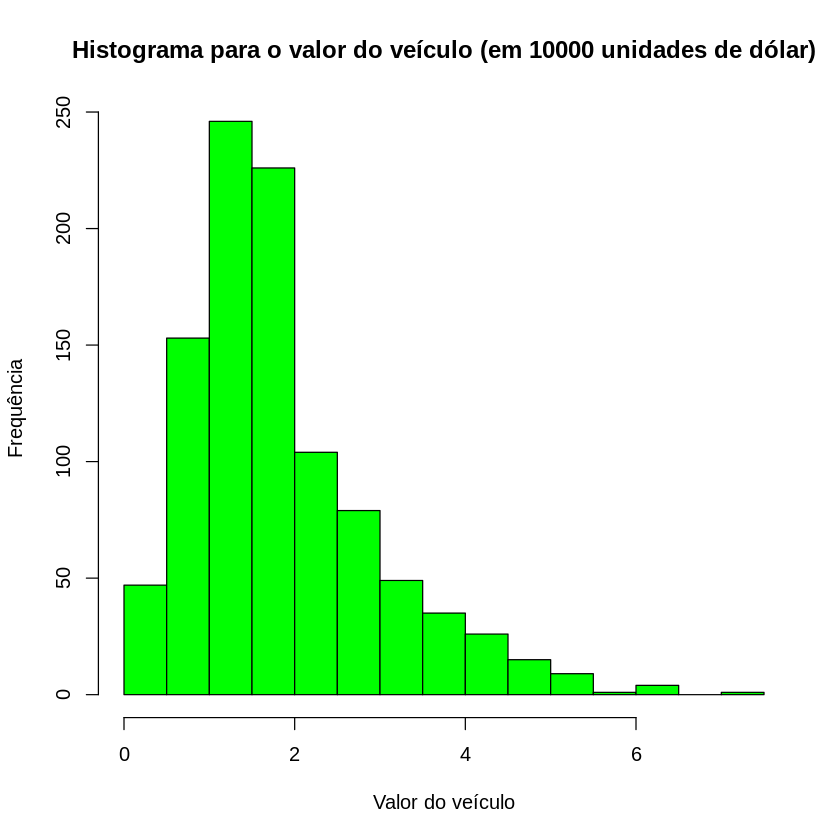

In [ ]:
# Gerando um histograma para a variável valorv
hist(data$valorv,
     main = "Histograma para o valor do veículo (em 10000 unidades de dólar)",
     xlab = "Valor do veículo",
     ylab = "Frequência",
     col = "green")

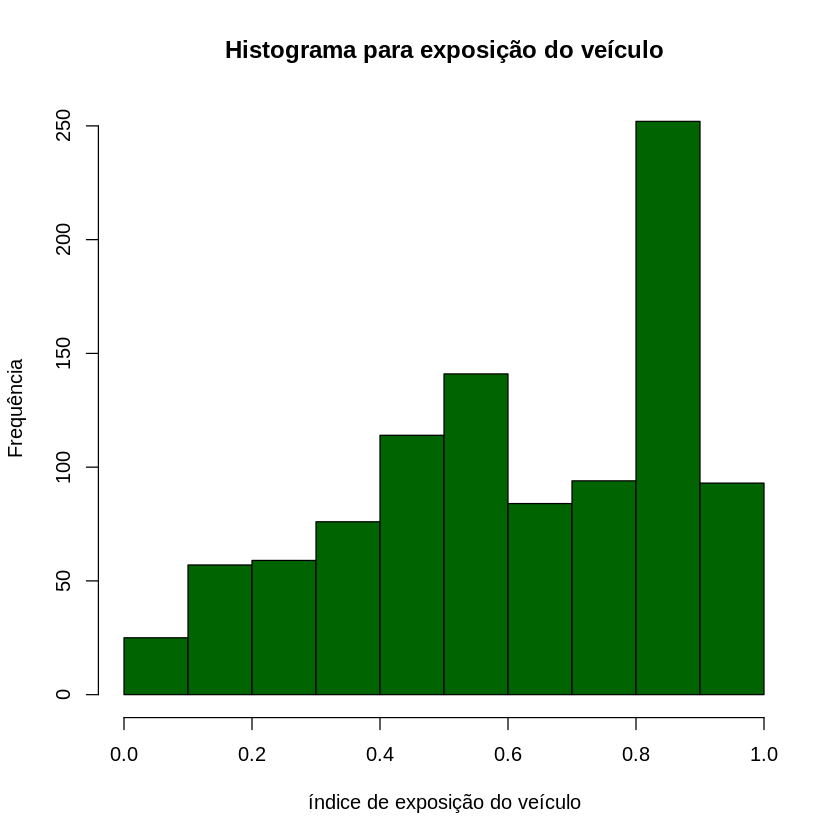

In [ ]:
# Gerando um histograma para a variável expos
hist(data$expos,
     main = "Histograma para exposição do veículo",
     xlab = "índice de exposição do veículo",
     ylab = "Frequência",
     col = "dark green")

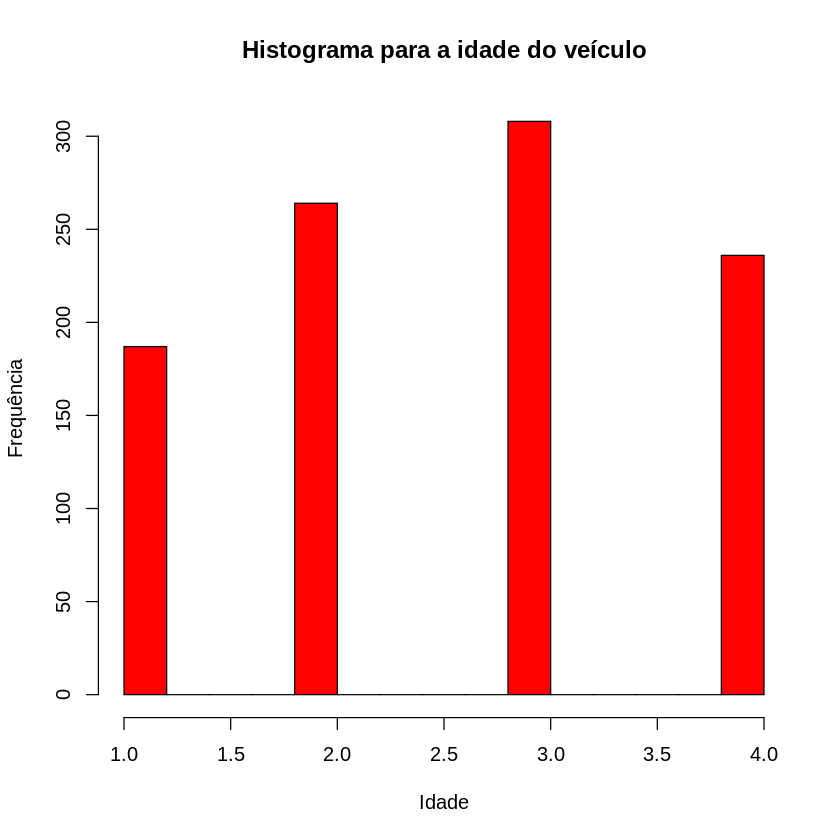

In [ ]:
# Gerando um histograma para a variável idadev
hist(data$idadev,
     main = "Histograma para a idade do veículo",
     xlab = "Idade",
     ylab = "Frequência",
     col = "red")

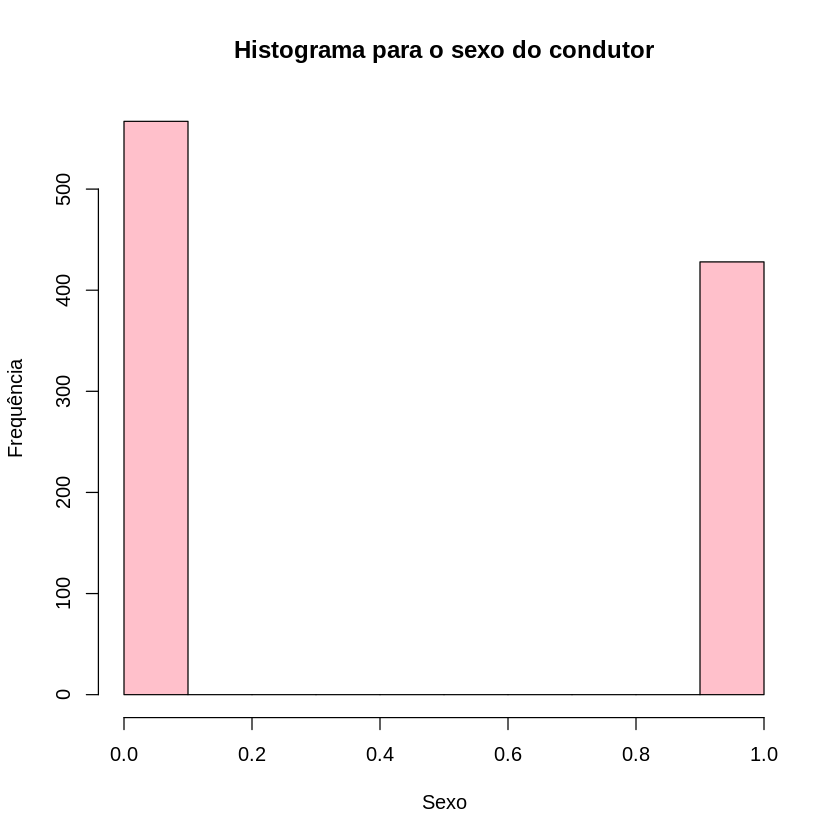

In [ ]:
# Gerando um histograma para a variável sexoc
hist(data$sexoc,
     main = "Histograma para o sexo do condutor",
     xlab = "Sexo",
     ylab = "Frequência",
     col = "pink")

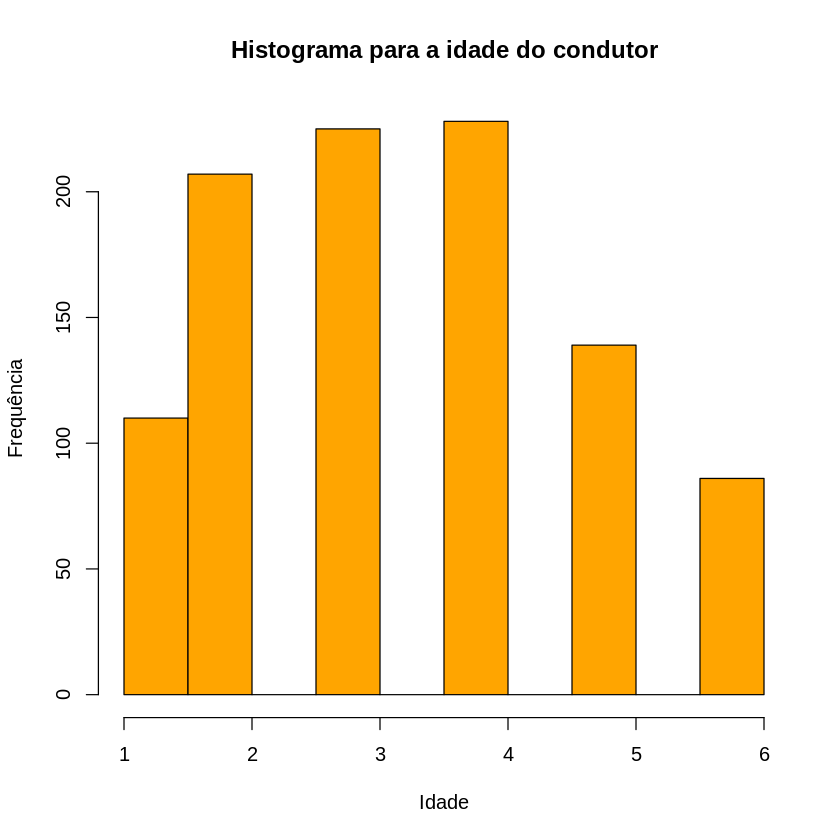

In [ ]:
# Gerando um histograma para a variável idadec
hist(data$idadec,
     main = "Histograma para a idade do condutor",
     xlab = "Idade",
     ylab = "Frequência",
     col = "orange")

# Ajustando o modelo

# **Modelo Gama**

In [ ]:
# Ajustando o modelo dglm usando cmsinistros como variável de resposta
modelo <- dglm(cmsinistros ~ valorv + expos + idadev + sexoc + idadec, data = data, family = Gamma(link = "log"))

# Visualizando o sumário do modelo
summary(modelo)


Call: dglm(formula = cmsinistros ~ valorv + expos + idadev + sexoc + 
    idadec, family = Gamma(link = "log"), data = data)

Mean Coefficients:
               Estimate Std. Error    t value      Pr(>|t|)
(Intercept)  8.06621277 0.27892502 28.9189291 9.277987e-134
valorv       0.01450949 0.05760667  0.2518716  8.011926e-01
expos       -1.23753425 0.19228073 -6.4360804  1.907974e-10
idadev       0.06588349 0.05915325  1.1137762  2.656458e-01
sexoc        0.18148888 0.10262922  1.7683939  7.730331e-02
idadec      -0.05781663 0.03526426 -1.6395246  1.014221e-01
(Dispersion Parameters for Gamma family estimated as below )

    Scaled Null Deviance: 1254.518 on 994 degrees of freedom
Scaled Residual Deviance: 1175.514 on 989 degrees of freedom

Dispersion Coefficients:
             Estimate Std. Error z value     Pr(>|z|)
(Intercept) 0.1871851 0.03881149 4.82293 1.414644e-06
(Dispersion parameter for Digamma family taken to be 2 )

    Scaled Null Deviance: 897.6542 on 994 degrees of freed

# Análise de Diagnóstico

Para a média

integer(0)

integer(0)

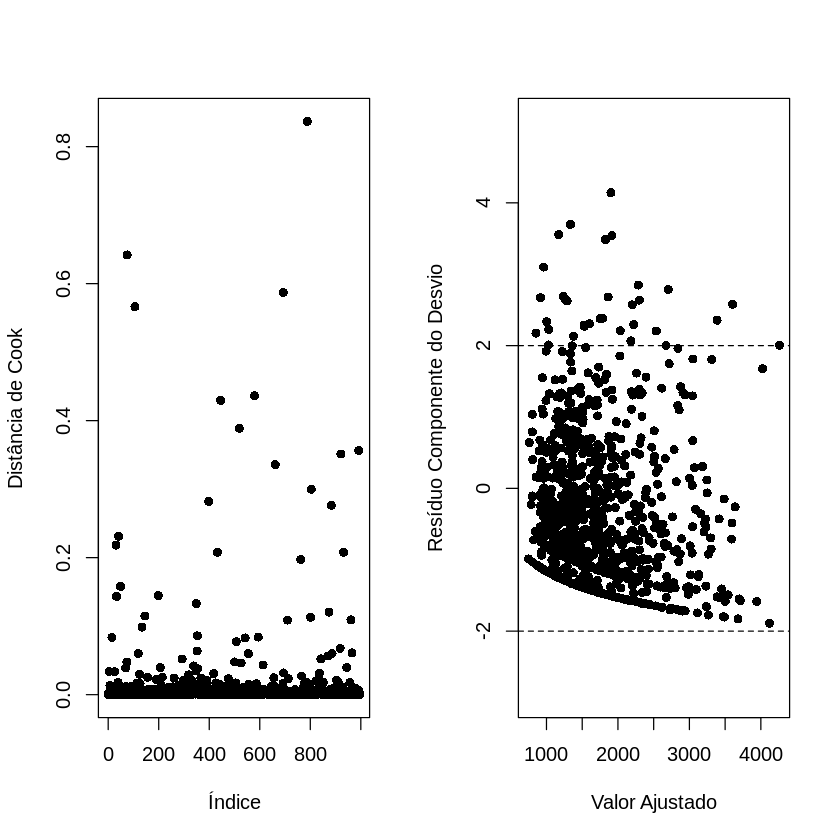

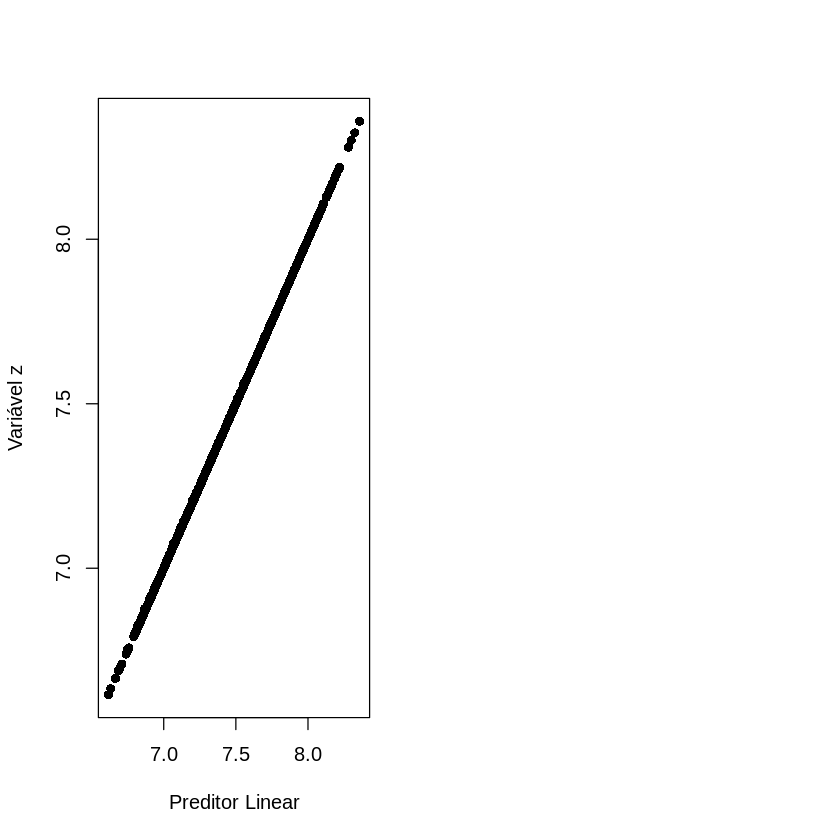

In [ ]:
# Configuração dos gráficos
par(mfrow=c(1,2))

# Extrair a matriz de design e parâmetros do modelo ajustado
X <- model.matrix(modelo)
n <- nrow(X)
p <- ncol(X)

# Carregar a biblioteca dglm
library(dglm)

# Estimativa do parâmetro fi da distribuição gama
fi <- fitted(modelo$dispersion)
fi <- 1 / fi  # Inverter fi, pois é o inverso da dispersão

# Ajuste dos pesos
w <- modelo$weights
w <- w * fi  # Ajustar os pesos com base em fi
W <- diag(w)  # Criar matriz diagonal de pesos

# Calcular a matriz de alavancagem (H)
H <- solve(t(X) %*% W %*% X)
H <- sqrt(W) %*% X %*% H %*% t(X) %*% sqrt(W)
h <- diag(H)  # Diagonal de H

# Calcular os resíduos
ts <- resid(modelo, type="pearson") * sqrt(fi / (1 - h))
td <- resid(modelo, type="deviance") * sqrt(fi / (1 - h))

# Distância de Cook
di <- (h / (1 - h)) * (ts^2)

# Definir limites para os gráficos de resíduos
a <- max(td)
b <- min(td)

# Gráfico da distância de Cook
plot(di, xlab="Índice", ylab="Distância de Cook", pch=16)
identify(di, n=1)  # Identificar pontos influentes

# Gráfico de resíduos de desvio
plot(fitted(modelo), td, xlab="Valor Ajustado",
     ylab="Resíduo Componente do Desvio", ylim=c(b - 1, a + 1), pch=16)
abline(2, 0, lty=2)  # Linha de limites superior
abline(-2, 0, lty=2)  # Linha de limites inferior
identify(fitted(modelo), td, n=1)  # Identificar pontos

# Gráfico da variável z (variável transformada)
w <- modelo$weights
eta <- predict(modelo)
z <- eta + resid(modelo, type="pearson") / sqrt(w)
plot(predict(modelo), z, xlab="Preditor Linear",
     ylab="Variável z", pch=16)

# Restaurar a configuração do gráfico
par(mfrow=c(1,1))

#------------------------------------------------------------#

A partir dos gráficos, é possível extrair algumas informações acerca do ajuste do modelo, tais como:

**Gráfico da Distância de Cook:** este gráfico mede a influência de observações individuais nos coeficientes do modelo, sendo possível observar uma grande quantidade de dados que impactam no ajuste desses coeficientes, alguns com relevância particularmente expressiva.

**Gráfico de Resíduos vs. Valores Ajustados:** utilizado para verificar a aleatoriedade dos resíduos, como pode ser observado acima, a maior parte dos resíduos se situam dentro do intervalo de confiança de 95%, com um número considerável extrapolando o limite superior deste intervalo, algo esperado e que não invalida a suposição de que os resíduos, provavelmente, seguem um padrão aleatório.

**Gráfico de Preditor Linear vs. Variável Z:** Verifica a relação linear entre o preditor linear e a variável z, a qual é dada por:

$$
z = \eta + \frac{\text{resíduo de Pearson}}{\sqrt{w}}
$$

onde:
- $\ \eta \$ é o preditor linear.

- $\ \text{resíduo de Pearson} \$ são os resíduos do tipo Pearson.

- $\ w \$ são os pesos do modelo.

A julgar pelo ajuste do gráfico, vemos que essa relação é quase perfeita.

Para a dispersão

integer(0)

integer(0)

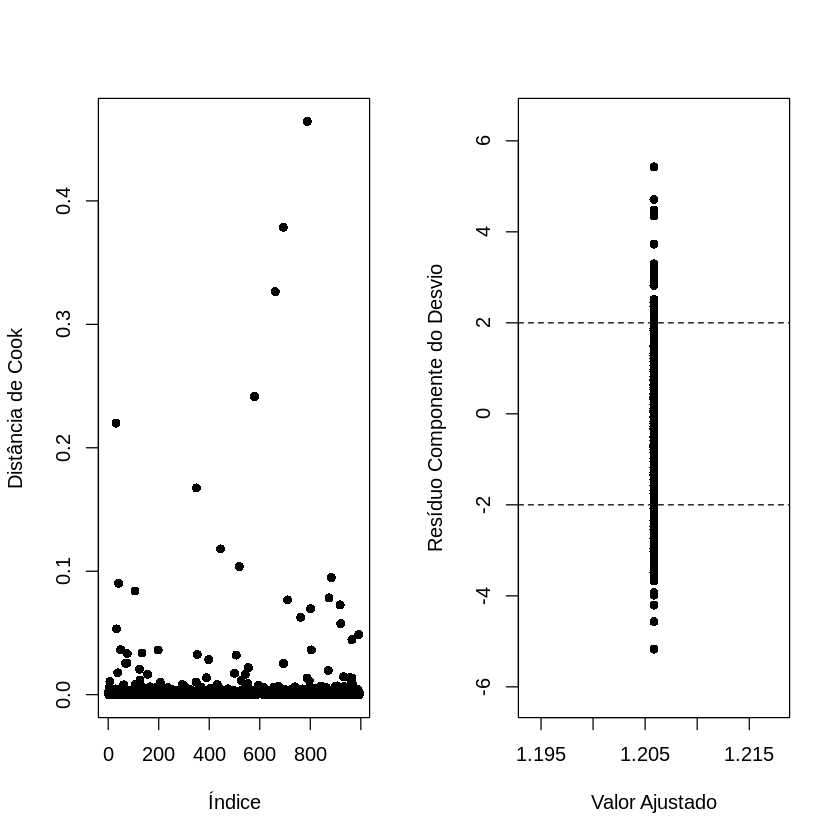

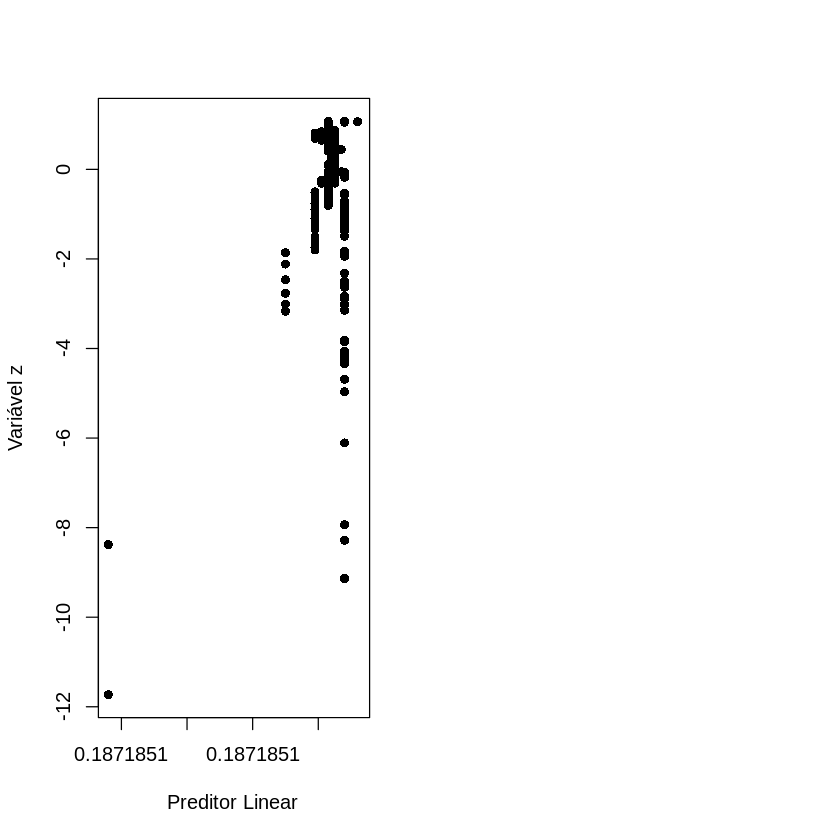

In [ ]:
#------------------------------------------------------------#
# Para rodar este programa, deixe no objeto modelo a saída
# do ajuste da regressão dupla com erros gama.
# Deixe os dados disponíveis através do comando
# attach(...). Depois use o comando source(...) no
# S-Plus ou R para executar o programa.
# A sequência de comandos é a seguinte:
#
#        > modelo <- ajuste
#        > attach(dados)
#        > source("diag_gama_dglm_disp")
#
# A saída terá quatro gráficos: de pontos de alavanca,
# de pontos influentes e dois de resíduos.
# Para identificar os pontos que mais se destacam
# usar o comando identify(...). Se por exemplo se destacam
# três pontos no plot(fitted(modelo),h,...), após esse comando coloque
#
#        > identify(fitted(modelo),h,n=3)
#
# O mesmo pode ser feito nos demais gráficos. Nos gráficos de
# resíduos foram colocados os limites ylim=c(a-1,b+1),
# em que a é o menor valor e b o maior valor para o resíduo.
# Este programa usa a library dglm para estimar os parâmetros
# fi da gama que estará guardado no objeto fi.
#------------------------------------------------------------#

# Preparação da matriz de design e extração de parâmetros
X <- model.matrix(modelo)
n <- nrow(X)
p <- ncol(X)
Z <- X  # A matriz Z é a mesma que X no caso da regressão Gamma

# Carregar a biblioteca dglm
library(dglm)

# Estimativas ajustadas para a média (mu) e a dispersão (fi)
mu <- fitted(modelo)
resp <- modelo$y
fi <- fitted(modelo$dispersion)
fi <- 1 / fi  # Inverter fi, pois é o inverso da dispersão

# Cálculo do termo p (para a matriz de dispersão)
p = fi * (fi * trigamma(fi) - 1)

# Matriz de pesos P e a matriz de alavancagem R
P <- diag(p)
R <- solve(t(Z) %*% P %*% Z)
R <- sqrt(P) %*% Z %*% R %*% t(Z) %*% sqrt(P)
r <- diag(R)  # Extrair a diagonal de R

# Cálculo do desvio t e transformação
t <- log(resp / mu) - resp / mu
t1 = t + 1 + log(fi) - digamma(fi)
tt = t1 / sqrt((1 - r) * (trigamma(fi) - 1 / fi))

# Configuração dos gráficos
par(mfrow=c(1,2))

# Cálculo dos resíduos de desvio e Cook's distance
td <- resid(modelo$dispersion, type="deviance") / sqrt(1 - r)

# Definir limites para o gráfico de resíduos
a <- max(td)
b <- min(td)

# Cálculo da distância de Cook
di = (r / (1 - r)) * (tt^2)

# Gráfico da distância de Cook
plot(di, xlab="Índice", ylab="Distância de Cook", pch=16)
identify(di, n=1)  # Identificar pontos influentes

# Gráfico de resíduos de desvio com limites
plot(fitted(modelo$dispersion), td, xlab="Valor Ajustado",
     ylab="Resíduo Componente do Desvio", ylim=c(b-1, a+1), pch=16)
abline(2, 0, lty=2)
abline(-2, 0, lty=2)
identify(fitted(modelo$dispersion), td, n=1)

# Gráfico de z versus preditor linear (comentado)
eta <- predict(modelo$dispersion)
z <- eta + t1 / (fi * trigamma(fi) - 1)
plot(eta, z, xlab="Preditor Linear", ylab="Variável z", pch=16)

par(mfrow=c(1,1))
#------------------------------------------------------------#

QQ-plots

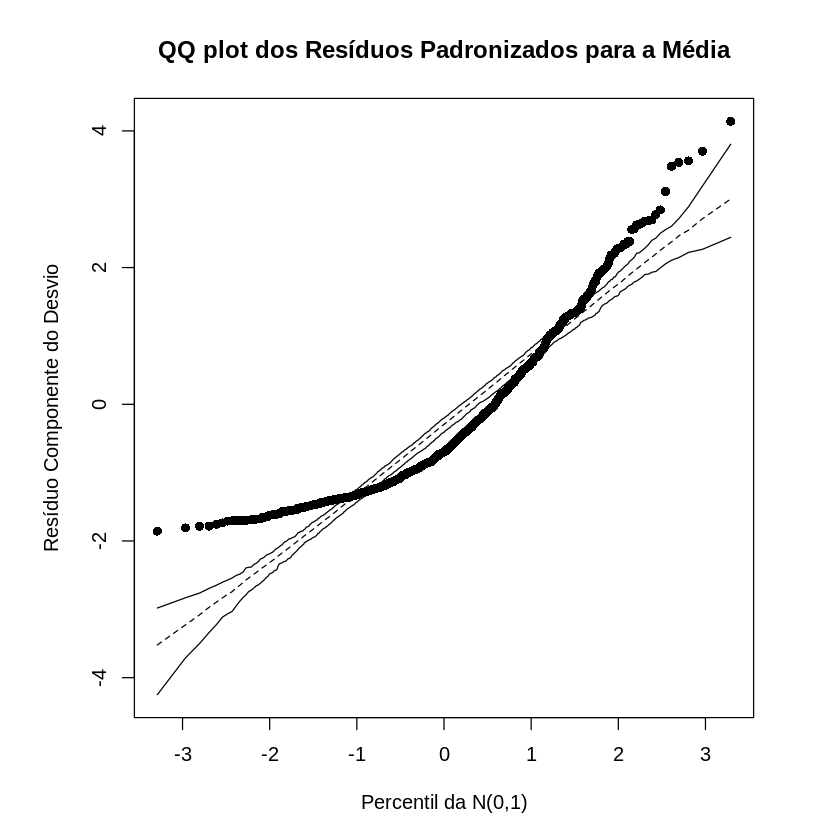

In [ ]:
#------------------------------------------------------------#
# Configurando as matrizes e calculando os resíduos
par(mfrow=c(1,1))
X <- model.matrix(modelo)
n <- nrow(X)
p <- ncol(X)
Z <- X
fi <- fitted(modelo$dispersion)
fi <- 1 / fi
mu <- fitted(modelo)
w <- fi / (mu^2)
W <- diag(w)
H <- solve(t(X) %*% W %*% X)
H <- sqrt(W) %*% X %*% H %*% t(X) %*% sqrt(W)
h <- diag(H)
td <- resid(modelo, type="deviance") * sqrt(fi / (1 - h))

# Matriz para armazenar os resíduos simulados
e <- matrix(0, n, 100)

# Função auxiliar para tratar valores infinitos
safe_solve <- function(mat) {
  if (any(is.na(mat)) || any(is.infinite(mat))) {
    stop("Matrix contains NA or infinite values")
  }
  solve(mat)
}

# Simulação para criar o envelope
for (i in 1:100) {
  resp <- rgamma(n, fi)
  resp <- (fitted(modelo) / fi) * resp
  fit <- tryCatch({
    dglm(resp ~ X, ~ Z, family = Gamma(link = "log"))
  }, error = function(e) {
    message("Erro ao ajustar o modelo na iteração ", i)
    return(NULL)
  })

  if (is.null(fit)) next

  fi <- fitted(fit$dispersion)
  fi <- 1 / fi
  mu <- fitted(fit)
  w <- fi / (mu^2)
  W <- diag(w)
  H <- tryCatch({
    safe_solve(t(X) %*% W %*% X)
  }, error = function(e) {
    message("Erro ao calcular a matriz H na iteração ", i)
    return(NULL)
  })

  if (is.null(H)) next

  H <- sqrt(W) %*% X %*% H %*% t(X) %*% sqrt(W)
  h <- diag(H)
  e[, i] <- sort(resid(fit, type="deviance") * sqrt(fi / (1 - h)))
}

# Cálculo dos envelopes
e1 <- numeric(n)
e2 <- numeric(n)

for (i in 1:n) {
  eo <- sort(e[i, ])
  e1[i] <- (eo[2] + eo[3]) / 2
  e2[i] <- (eo[97] + eo[98]) / 2
}

med <- apply(e, 1, mean)
faixa <- range(td, e1, e2)
par(pty = "s")

# Plotando o QQ Plot com os envelopes
qqnorm(td, xlab = "Percentil da N(0,1)",
       ylab = "Resíduo Componente do Desvio", ylim = faixa, pch = 16, main = "")
par(new = TRUE)
qqnorm(e1, axes = FALSE, xlab = "", ylab = "", type = "l", ylim = faixa, lty = 1, main = "")
par(new = TRUE)
qqnorm(e2, axes = FALSE, xlab = "", ylab = "", type = "l", ylim = faixa, lty = 1, main = "")
par(new = TRUE)
qqnorm(med, axes = FALSE, xlab = "", ylab = "", type = "l", ylim = faixa, lty = 2, main = "")

# Adicionando o título ao gráfico
title("QQ plot dos Resíduos Padronizados para a Média")
#------------------------------------------------------------#

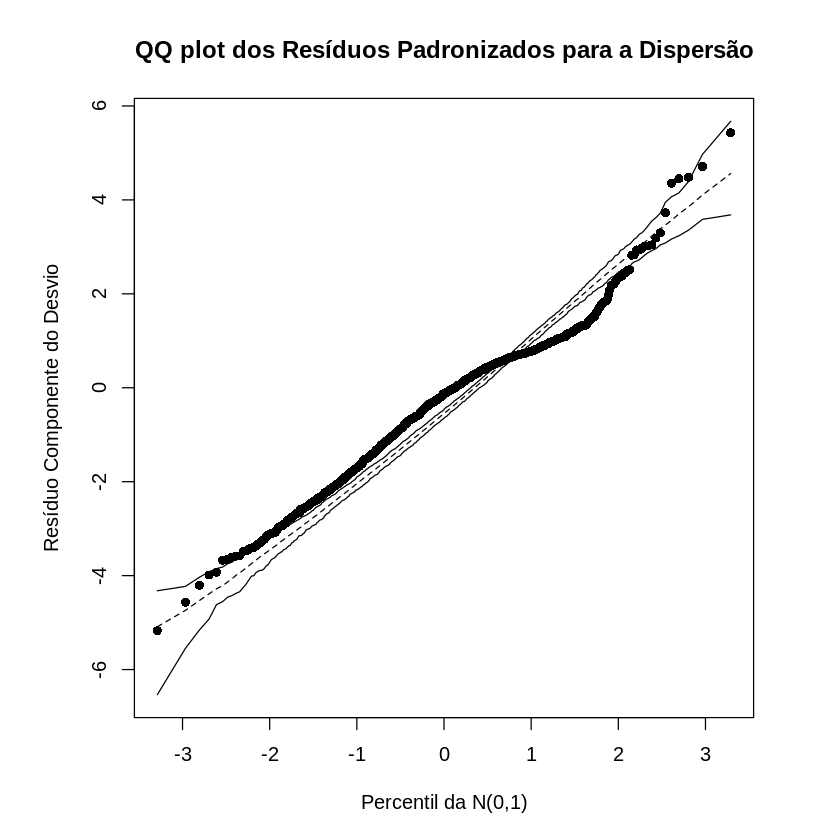

In [ ]:
# Configuração inicial
par(mfrow = c(1, 1))

# Matriz de design para a média e dispersão
fit.model <- modelo
X <- model.matrix(fit.model)
Z <- X  # Supondo Z = X; ajuste se necessário
n <- nrow(X)
p <- ncol(X)

# Pesos e cálculos para a dispersão
library(dglm)
mu <- fitted(fit.model)
fi <- fitted(fit.model$dispersion)
fi <- 1 / fi
p <- fi * (fi * trigamma(fi) - 1)
P <- diag(p)

# Matriz de alavancagem para dispersão
R <- solve(t(Z) %*% P %*% Z)
R <- sqrt(P) %*% Z %*% R %*% t(Z) %*% sqrt(P)
r <- diag(R)

# Resíduos padronizados para dispersão
td <- resid(fit.model$dispersion, type = "deviance") / sqrt(1 - r)

# Simulações para o envelope
e <- matrix(0, n, 100)
for (i in 1:100) {
  resp1 <- rgamma(n, fi)
  resp1 <- (fitted(fit.model) / fi) * resp1
  fit <- dglm(resp1 ~ X, ~ Z, family = Gamma(link = "log"))
  mu <- fitted(fit)
  fi1 <- fitted(fit$dispersion)
  fi1 <- 1 / fi1
  p <- fi1 * (fi1 * trigamma(fi1) - 1)
  P <- diag(p)
  R <- solve(t(Z) %*% P %*% Z)
  R <- sqrt(P) %*% Z %*% R %*% t(Z) %*% sqrt(P)
  r <- diag(R)
  e[, i] <- sort(resid(fit$dispersion, type = "deviance") / sqrt(1 - r))
}

# Estatísticas do envelope
e1 <- numeric(n)
e2 <- numeric(n)
for (i in 1:n) {
  eo <- sort(e[i, ])
  e1[i] <- (eo[2] + eo[3]) / 2
  e2[i] <- (eo[97] + eo[98]) / 2
}

med <- apply(e, 1, mean)
faixa <- range(td, e1, e2)

# Gráfico de envelope
par(pty = "s")
qqnorm(td, xlab = "Percentil da N(0,1)",
       ylab = "Resíduo Componente do Desvio", ylim = faixa, pch = 16,
       main = "")
par(new = TRUE)
qqnorm(e1, axes = FALSE, xlab = "", ylab = "", type = "l", ylim = faixa, lty = 1, main = "")
par(new = TRUE)
qqnorm(e2, axes = FALSE, xlab = "", ylab = "", type = "l", ylim = faixa, lty = 1, main = "")
par(new = TRUE)
qqnorm(med, axes = FALSE, xlab = "", ylab = "", type = "l", ylim = faixa, lty = 2, main = "")

# Adicionando o título ao gráfico
title("QQ plot dos Resíduos Padronizados para a Dispersão")
#------------------------------------------------------------#

**QQ plot dos Resíduos Padronizados para a Média:** observamos uma grande quantidade de observações fora dos limites de tolerância, trazendo fortes indicativos de que esses resíduos não seguem uma distribuição normal.

**QQ plot dos Resíduos Padronizados para a Dispersão:** é possível observar uma grande quantidade de valores fora dos limites dos envelopes do QQ plot, não satisfazendo as supozições para a normalida dos resíduos da dispersão.


# **Modelo normal inverso**

In [ ]:
# Ajustando o modelo dglm usando cmsinistros como variável de resposta
modelo <- dglm(
  cmsinistros ~ valorv + expos + idadev + sexoc + idadec,
  data = data,
  family = inverse.gaussian(link = "log") # Definindo a família Inverse Gaussian com ligação log
)

# Visualizando o sumário do modelo
summary(modelo)


Call: dglm(formula = cmsinistros ~ valorv + expos + idadev + sexoc + 
    idadec, family = inverse.gaussian(link = "log"), data = data)

Mean Coefficients:
               Estimate Std. Error   t value      Pr(>|t|)
(Intercept)  8.20088316 0.27876403 29.418728 3.631298e-137
valorv       0.06488956 0.05320638  1.219582  2.229140e-01
expos       -1.68673258 0.23401348 -7.207844  1.127304e-12
idadev       0.07715683 0.06129358  1.258808  2.083968e-01
sexoc        0.34421489 0.11167583  3.082269  2.111187e-03
idadec      -0.13130282 0.03801705 -3.453788  5.762114e-04
(Dispersion Parameters for inverse.gaussian family estimated as below )

    Scaled Null Deviance: 932.5155 on 994 degrees of freedom
Scaled Residual Deviance: 995.0014 on 989 degrees of freedom

Dispersion Coefficients:
             Estimate Std. Error   z value Pr(>|z|)
(Intercept) -6.475928 0.04483358 -144.4437        0
(Dispersion parameter for Gamma family taken to be 2 )

    Scaled Null Deviance: 1020.304 on 994 degrees

# Análise de Diagnóstico

Para a média

integer(0)

integer(0)

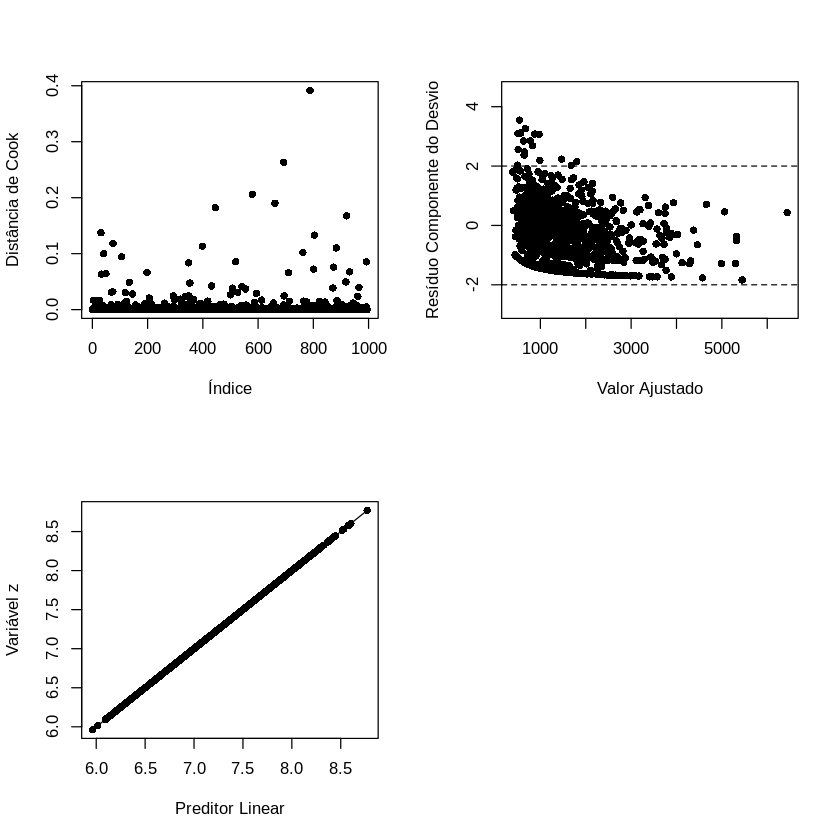

In [ ]:
#-----------------------------------------------------------#
# Para rodar este programa, deixe no objeto modelo a saída
# do ajuste da regressão dupla com erros normal inversa.
# Deixe os dados disponíveis através do comando
# attach(...). Depois use o comando source(...) no R ou
# S-Plus para executar o programa. A sequência de comandos
# é a seguinte:
#
#        > modelo <- ajuste
#        > attach(dados)
#        > source("diag_ninv_dglm")
#
# A saída terá quatro gráficos: de pontos de alavanca, de
# pontos influentes e dois de resíduos. Para identificar
# os pontos que mais se destacam usar o comando
# identify(...). Se por exemplo se destacam três pontos
# no plot(fitted(modelo),h,...), após esse comando coloque
#
#        > identify(fitted(modelo),h,n=3)
#
# O mesmo pode ser feito nos demais gráficos. Nos gráficos de
# resíduos foram colocados os limites ylim=c(a-1,b+1), em que
# a é o menor valor e b o maior valor para o resíduo.
#-----------------------------------------------------------#

# Preparação da matriz de design e extração de parâmetros
X <- model.matrix(modelo)
n <- nrow(X)
p <- ncol(X)

# Carregar a biblioteca dglm
library(dglm)

# Estimativas ajustadas para a dispersão (fi) e os pesos
fi <- fitted(modelo$dispersion)
fi <- 1 / fi  # Inverter fi, pois é o inverso da dispersão
w <- modelo$weights
w <- w * fi
W <- diag(w)

# Matriz de alavancagem H
H <- solve(t(X) %*% W %*% X)
H <- sqrt(W) %*% X %*% H %*% t(X) %*% sqrt(W)
h <- diag(H)

# Resíduos tipo Pearson e desvio
ts <- resid(modelo, type="pearson") * sqrt(fi / (1 - h))
td <- resid(modelo, type="deviance") * sqrt(fi / (1 - h))

# Configuração dos gráficos
par(mfrow=c(2,2))

# Cálculo da distância de Cook
di <- (h / (1 - h)) * (ts^2)
a <- max(td)
b <- min(td)

# Gráfico da distância de Cook
plot(di, xlab="Índice", ylab="Distância de Cook", pch=16)
identify(di, n=1)  # Identificar pontos influentes

# Gráfico de resíduos de desvio com limites
plot(fitted(modelo), td, xlab="Valor Ajustado",
     ylab="Resíduo Componente do Desvio", ylim=c(b-1, a+1), pch=16)
abline(2, 0, lty=2)
abline(-2, 0, lty=2)
identify(fitted(modelo), td, n=1)

# Gráfico de z versus preditor linear (comentado)
eta <- predict(modelo)
z <- eta + resid(modelo, type="pearson") / sqrt(w)
plot(predict(modelo), z, xlab="Preditor Linear", ylab="Variável z", pch=16)
lines(smooth.spline(predict(modelo), z, df=2))

par(mfrow=c(1,1))
#------------------------------------------------------------#

A partir dos gráficos, é possível extrair algumas informações acerca do ajuste do modelo, tais como:

**Gráfico da Distância de Cook:** assim como no caso anterior, observamos a influência de observações individuais nos coeficientes do modelo, sendo possível observar uma grande quantidade de dados que impactam no ajuste desses coeficientes, alguns com relevância particularmente expressiva.

**Gráfico de Resíduos vs. Valores Ajustados:** a distribuição dos resíduos se assemelha ao caso gama, sendo possível observar que a maior parte dos resíduos se situam dentro do intervalo de confiança de 95%, com um número considerável extrapolando o limite superior deste intervalo, algo esperado e que não invalida a suposição de que os resíduos, provavelmente, seguem um padrão aleatório.

**Gráfico de Preditor Linear vs. Variável Z:** o ajuste do gráfico nos permite visualizar uma relação quase perfeita.

Para a dispersão

integer(0)

integer(0)

ERROR: Error in smooth.spline(predict(modelo$dispersion), z, df = 2): 'tol' must be strictly positive and finite


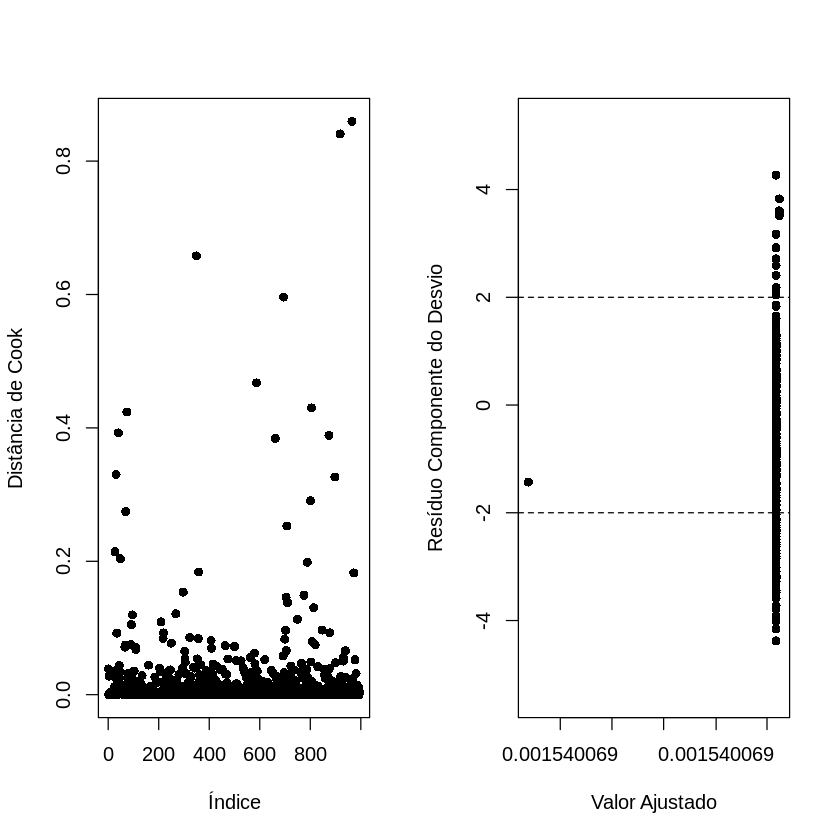

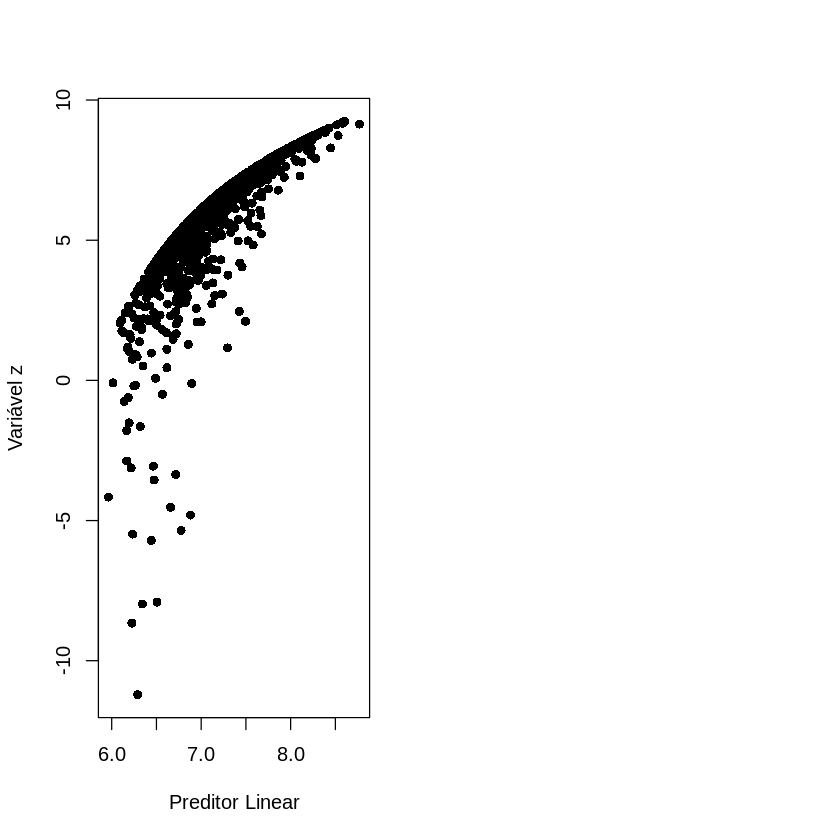

In [ ]:
# Preparação da matriz de design e extração de parâmetros
X <- model.matrix(modelo)
n <- nrow(X)
p <- ncol(X)
Z <- X

# Carregar a biblioteca dglm
library(dglm)

# Estimativas ajustadas para a resposta (mu), dispersão (fi) e outros parâmetros
mu <- fitted(modelo)
resp <- modelo$y
fi <- fitted(modelo$dispersion)
fi <- 1 / fi  # Inverter fi, pois é o inverso da dispersão

# Cálculo da matriz R
R <- solve(t(Z) %*% Z)
R <- Z %*% R %*% t(Z)
r <- diag(R)

# Cálculo de t e t1
t <- -(resp / (2 * mu * mu) + 1 / mu + 1 / (2 * mu))
t1 = t + 1 / (2 * fi)
tt = t1 / (sqrt(1 - r) * (1 / (fi * sqrt(2))))

# Cálculo dos resíduos de desvio
td <- resid(modelo$dispersion, type="deviance") / sqrt(1 - r)

# Configuração dos gráficos
par(mfrow=c(1,2))

# Cálculo da distância de Cook
a <- max(td)
b <- min(td)
di = (r / (1 - r)) * (tt^2)

# Gráfico da distância de Cook
plot(di, xlab="Índice", ylab="Distância de Cook", pch=16)
identify(di, n=1)  # Identificar pontos influentes

# Gráfico de resíduos de desvio com limites
plot(fitted(modelo$dispersion), td, xlab="Valor Ajustado",
     ylab="Resíduo Componente do Desvio", ylim=c(b - 1, a + 1), pch=16)
abline(2, 0, lty=2)
abline(-2, 0, lty=2)
identify(fitted(modelo), td, n=1)

# Gráfico de z versus preditor linear (comentado)
# eta <- predict(modelo$dispersion)
z <- eta + 2 * fi * t1
plot(eta, z, xlab="Preditor Linear", ylab="Variável z", pch=16)
lines(smooth.spline(predict(modelo$dispersion), z, df=2))

par(mfrow=c(1,1))
#------------------------------------------------------------#

É possível observar o comportamento anômalo da relação entre os resíduos e valores preditos, bem como entre o preditor linear e a variável z, algo que também ocorreu no modelo gama.

QQ-Plots

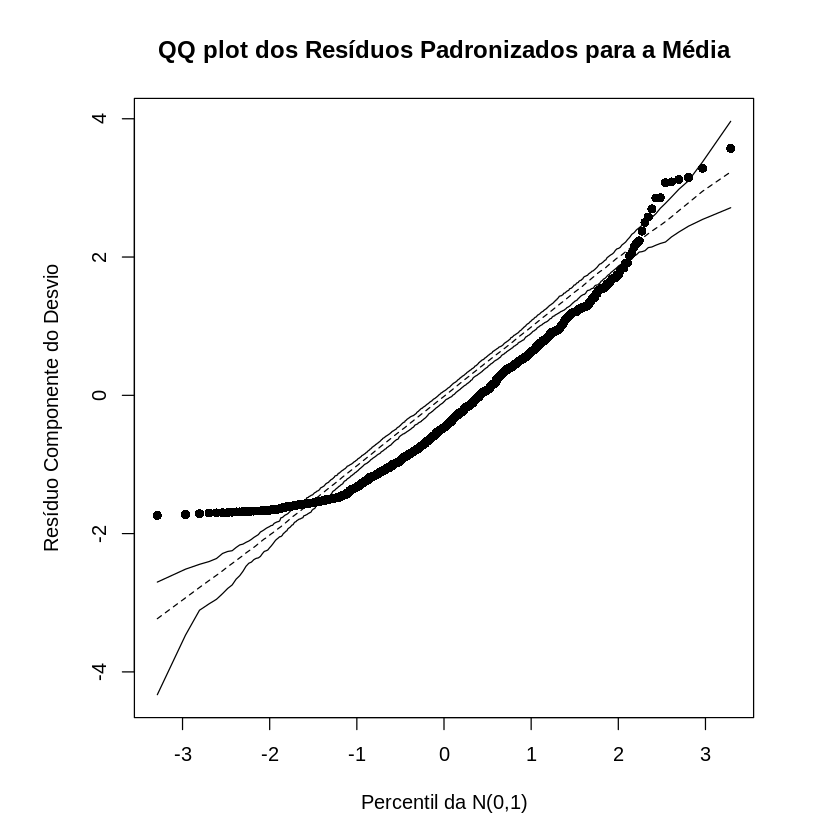

In [ ]:
#------------------------------------------------------------#
# Configurando as matrizes e calculando os resíduos
par(mfrow=c(1,1))
X <- model.matrix(modelo)
n <- nrow(X)
p <- ncol(X)
Z <- X
fi <- fitted(modelo$dispersion)
fi <- 1 / fi
mu <- fitted(modelo)
w <- fi / (mu^2)
W <- diag(w)
H <- solve(t(X) %*% W %*% X)
H <- sqrt(W) %*% X %*% H %*% t(X) %*% sqrt(W)
h <- diag(H)
td <- resid(modelo, type="deviance") * sqrt(fi / (1 - h))

# Matriz para armazenar os resíduos simulados
e <- matrix(0, n, 100)

# Função auxiliar para tratar valores infinitos
safe_solve <- function(mat) {
  if (any(is.na(mat)) || any(is.infinite(mat))) {
    stop("Matrix contains NA or infinite values")
  }
  solve(mat)
}

# Simulação para criar o envelope
for (i in 1:100) {
  resp <- rgamma(n, fi)
  resp <- (fitted(modelo) / fi) * resp
  fit <- tryCatch({
    dglm(resp ~ X, ~ Z, family = Gamma(link = "log"))
  }, error = function(e) {
    message("Erro ao ajustar o modelo na iteração ", i)
    return(NULL)
  })

  if (is.null(fit)) next

  fi <- fitted(fit$dispersion)
  fi <- 1 / fi
  mu <- fitted(fit)
  w <- fi / (mu^2)
  W <- diag(w)
  H <- tryCatch({
    safe_solve(t(X) %*% W %*% X)
  }, error = function(e) {
    message("Erro ao calcular a matriz H na iteração ", i)
    return(NULL)
  })

  if (is.null(H)) next

  H <- sqrt(W) %*% X %*% H %*% t(X) %*% sqrt(W)
  h <- diag(H)
  e[, i] <- sort(resid(fit, type="deviance") * sqrt(fi / (1 - h)))
}

# Cálculo dos envelopes
e1 <- numeric(n)
e2 <- numeric(n)

for (i in 1:n) {
  eo <- sort(e[i, ])
  e1[i] <- (eo[2] + eo[3]) / 2
  e2[i] <- (eo[97] + eo[98]) / 2
}

med <- apply(e, 1, mean)
faixa <- range(td, e1, e2)
par(pty = "s")

# Plotando o QQ Plot com os envelopes
qqnorm(td, xlab = "Percentil da N(0,1)",
       ylab = "Resíduo Componente do Desvio", ylim = faixa, pch = 16, main = "")
par(new = TRUE)
qqnorm(e1, axes = FALSE, xlab = "", ylab = "", type = "l", ylim = faixa, lty = 1, main = "")
par(new = TRUE)
qqnorm(e2, axes = FALSE, xlab = "", ylab = "", type = "l", ylim = faixa, lty = 1, main = "")
par(new = TRUE)
qqnorm(med, axes = FALSE, xlab = "", ylab = "", type = "l", ylim = faixa, lty = 2, main = "")

# Adicionando o título ao gráfico
title("QQ plot dos Resíduos Padronizados para a Média")
#------------------------------------------------------------#

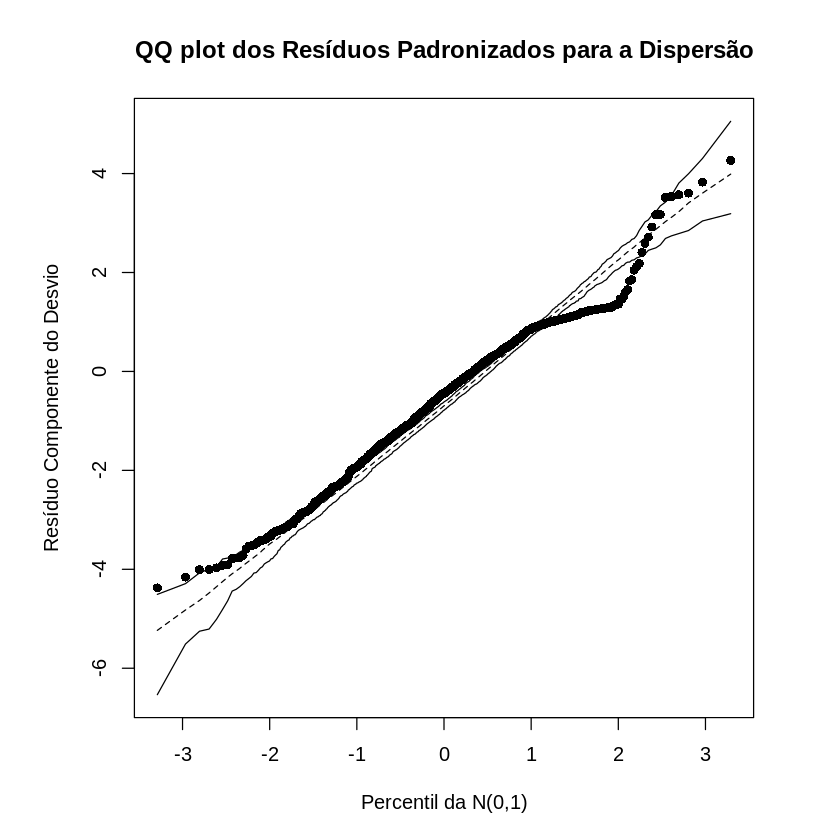

In [ ]:
# Configuração inicial
par(mfrow = c(1, 1))

# Matriz de design para a média e dispersão
fit.model <- modelo
X <- model.matrix(fit.model)
Z <- X  # Supondo Z = X; ajuste se necessário
n <- nrow(X)
p <- ncol(X)

# Pesos e cálculos para a dispersão
library(dglm)
mu <- fitted(fit.model)
fi <- fitted(fit.model$dispersion)
fi <- 1 / fi
p <- fi * (fi * trigamma(fi) - 1)
P <- diag(p)

# Matriz de alavancagem para dispersão
R <- solve(t(Z) %*% P %*% Z)
R <- sqrt(P) %*% Z %*% R %*% t(Z) %*% sqrt(P)
r <- diag(R)

# Resíduos padronizados para dispersão
td <- resid(fit.model$dispersion, type = "deviance") / sqrt(1 - r)

# Simulações para o envelope
e <- matrix(0, n, 100)
for (i in 1:100) {
  resp1 <- rgamma(n, fi)
  resp1 <- (fitted(fit.model) / fi) * resp1
  fit <- dglm(resp1 ~ X, ~ Z, family = Gamma(link = "log"))
  mu <- fitted(fit)
  fi1 <- fitted(fit$dispersion)
  fi1 <- 1 / fi1
  p <- fi1 * (fi1 * trigamma(fi1) - 1)
  P <- diag(p)
  R <- solve(t(Z) %*% P %*% Z)
  R <- sqrt(P) %*% Z %*% R %*% t(Z) %*% sqrt(P)
  r <- diag(R)
  e[, i] <- sort(resid(fit$dispersion, type = "deviance") / sqrt(1 - r))
}

# Estatísticas do envelope
e1 <- numeric(n)
e2 <- numeric(n)
for (i in 1:n) {
  eo <- sort(e[i, ])
  e1[i] <- (eo[2] + eo[3]) / 2
  e2[i] <- (eo[97] + eo[98]) / 2
}

med <- apply(e, 1, mean)
faixa <- range(td, e1, e2)

# Gráfico de envelope
par(pty = "s")
qqnorm(td, xlab = "Percentil da N(0,1)",
       ylab = "Resíduo Componente do Desvio", ylim = faixa, pch = 16,
       main = "")
par(new = TRUE)
qqnorm(e1, axes = FALSE, xlab = "", ylab = "", type = "l", ylim = faixa, lty = 1, main = "")
par(new = TRUE)
qqnorm(e2, axes = FALSE, xlab = "", ylab = "", type = "l", ylim = faixa, lty = 1, main = "")
par(new = TRUE)
qqnorm(med, axes = FALSE, xlab = "", ylab = "", type = "l", ylim = faixa, lty = 2, main = "")

# Adicionando o título ao gráfico
title("QQ plot dos Resíduos Padronizados para a Dispersão")
#------------------------------------------------------------#

**QQ plot dos Resíduos Padronizados para a Média:** assim como no caso anterior, observamos uma grande quantidade de observações fora dos limites de tolerância, trazendo fortes indicativos de que esses resíduos não seguem uma distribuição normal.

**QQ plot dos Resíduos Padronizados para a Dispersão:** ainda que muito próximos dos limites do envelope, é possível observar uma grande quantidade de valores fora dos limites dos envelopes do QQ plot, não satisfazendo as supozições para a normalida dos resíduos da dispersão.

**Conclusão:** ambos os modelos apresentaram um ajuste ruim aos dados, com resíduos não normais e com padrão não aleatório, o modelo dglm não retorna um valor numérico para o AIC, razão pela qual essa métrica não foi aplicada, em relação a distância de Cook, ambos os ajustes apresentaram desempenho bastante similar, em suma, chegamos à conclusão de que não existe um modelo mais adequado para os dados, dado que ambos não apresentaram boa performance na maior parte das métricas empregadas para avaliação.